In [5]:
import serial, sys
from xbee import XBee

SERIALPORT = "/dev/ttyUSB0"
BAUDRATE=9600

ser  = serial.Serial(SERIALPORT, BAUDRATE)

def write_check(cmd):
    ser.write(cmd)

    b = 0
    r = ''

    while b != '\r' and b != '\n':
        b = ser.read(1)
        r = r + b

    if r[:2] != "OK":
        print ("!!! XBEE NOT OK !!!")
        return False

    return True


print (" * Waiting for the XBee...")

if write_check("+++"):
    print (" * XBee ready ! Configuring it now...")
else:
    sys.exit(1)

write_check("ATRE\r")
write_check("ATAP2\r")
write_check("ATCE1\r")
write_check("ATMY3141\r")
write_check("ATID1111\r")
write_check("ATCH0C\r")

print (" * Writing configuration...")

if write_check("ATCN\r"):
    print (" * Configuration done. Start listening...")
else:
    sys.exit(1)

xbee = XBee(ser)

while True:
    try:
        r = xbee.wait_read_frame()
        print (r)
    except KeyboardInterrupt:
        break

ser.close()


 * Waiting for the XBee...


TypeError: unicode strings are not supported, please encode to bytes: '+++'

**Configuration réalisée avec 2 Xbee S2.**
 - l'un est configuré en COORDINATEUR AT : COORDINATOR AT
     - Configurer le PAN ID : 1234
     - Il est optionnel de configurer le NODE ID : "COORDINATOR1"
     - Sauvegarder les valeurs des registres **SH** et **SL** de ce module XBee S2. Celles-ci seront nécessaires pour la configuration du module Routeur. 
         Dans notre cas :
             - SH = 13A200
             - SL = 4063D1BE
         -> L'adresse source du coordinateur est donc : 13A200406D1BE.
      - Cliquer sur "Write" et X-CTU va démarrer le chargement dans le Xbee des paramètres qui viennent d'être configurés





Click “Write” and X-CTU will start loading the parameter you just set.



 
 - l'autre est configuré en ROUTEUR
 Router

If you have another SKXBee, connect it to your computer with another XBee S2 plug in. I will be using the same SKXBee, so I actually exchange the XBee 2S on it.

Launch X-CTU

“ZIGBEE ROUTER AT” under Function Set,

Set a preferable PAN ID, I simply set “1234”.

You can also set the Node ID, I set “ROUTER1” as node ID. This is not critical.

Record the SH and SL ID on this XBee S2 module, you will need it to set Coordinator module. In my case, the SH is 13A200, SL is 4086A429.

Key in the DH and DL address using the SH and SL from Coordinator module. My case is DH: 13A200, DL: 408C1470.






++++ Again, Coordinator

Do not forget, we need to set the DH and DL on Coordinator XBee S2 module. Again, plug in Coordinator XBee S2 module, open X-CTU, read the information, and set the DH and DL that you grab from router’s SH and SL. Click write to load the parameters into XBee module.

TypeError: can't concat str to bytes

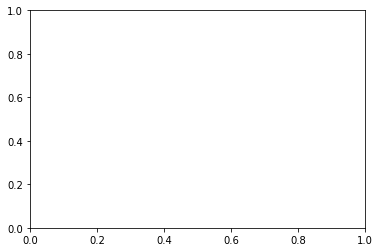

In [8]:
#!/usr/bin/env python
import time
import serial
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

coord = serial.Serial(
 port='/dev/ttyUSB1',
 baudrate = 9600,
 parity=serial.PARITY_NONE,
 stopbits=serial.STOPBITS_ONE,
 bytesize=serial.EIGHTBITS,
 timeout=1
)

router = serial.Serial( port='/dev/ttyUSB0',
 baudrate = 9600,
 parity=serial.PARITY_NONE,
 stopbits=serial.STOPBITS_ONE,
 bytesize=serial.EIGHTBITS,
 timeout=1
)
i=0
counter=0
#ser.open()
t = np.linspace(0.0, 1.0, num=5)
%matplotlib inline

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
while 1:
#    
    router.write('12'.encode('ascii'))
    
    #x=coord.readline()
    #print(x.decode('ascii'))
#    break
    
    
#plt.plot(t[i],x)


#def animate(i):
#    pullData = open("sampleText.txt","r").read()
#    dataArray = pullData.split('\n')
#    xar = []
#    yar = []
#    for eachLine in dataArray:
#        if len(eachLine)>1:
#            x,y = eachLine.split(',')
#            xar.append(int(x))
#            yar.append(int(y))
#    ax1.clear()
#    ax1.plot(xar,yar)
#ani = animation.FuncAnimation(fig, animate, interval=1000)
#plt.show()
 #print(x.decode('ascii'))


In [ ]:
import pyqtgraph.examples
#import initExample ## Add path to library (just for examples; you do not need this)


from pyqtgraph.Qt import QtGui, QtCore
import numpy as np
import pyqtgraph as pg
import sys

#QtGui.QApplication.setGraphicsSystem('raster')
app = QtGui.QApplication([])
#mw = QtGui.QMainWindow()
#mw.resize(800,800)

win = pg.GraphicsWindow(title="Basic plotting examples")
win.resize(1000,600)
win.setWindowTitle('pyqtgraph example: Plotting')

# Enable antialiasing for prettier plots
pg.setConfigOptions(antialias=True)

ptr = 0
def update():
    global curve, data, ptr, p6
    curve.setData(data[ptr%10])
    if ptr == 0:
        p6.enableAutoRange('xy', False)  ## stop auto-scaling after the first data set is plotted
    ptr += 1
timer = QtCore.QTimer()
timer.timeout.connect(update)
timer.start(50)


x2 = np.linspace(-100, 100, 1000)
data2 = np.sin(x2) / x2
lr = pg.LinearRegionItem([400,700])
lr.setZValue(-10)

data = coord.readline()
p6 = win.addPlot(title="Updating plot")
curve = p6.plot(pen='y')
#data = np.random.normal(size=(10,1000))
ptr = 0
def update():
    global curve, data, ptr, p6
    #curve.setData(data[ptr%10])
    curve.setData(data[ptr%1])
    if ptr == 0:
        p6.enableAutoRange('xy', False)  ## stop auto-scaling after the first data set is plotted
    ptr += 1
timer = QtCore.QTimer()
timer.timeout.connect(update)
timer.start(50)


win.nextRow()

#p9 = win.addPlot(title="Zoom on selected region")
#p9.plot(data2)
def updatePlot():
    p9.setXRange(*lr.getRegion(), padding=0)
def updateRegion():
    lr.setRegion(p9.getViewBox().viewRange()[0])
lr.sigRegionChanged.connect(updatePlot)
p9.sigXRangeChanged.connect(updateRegion)
updatePlot()

## Start Qt event loop unless running in interactive mode or using pyside.
if __name__ == '__main__':
    if (sys.flags.interactive != 1) or not hasattr(QtCore, 'PYQT_VERSION'):
        QtGui.QApplication.instance().exec_()